<a href="https://colab.research.google.com/github/marinasbrum/ExploringNonverbalCommunication/blob/main/Emotional_Responses_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importação de Bibliotecas:

In [215]:
import pandas as pd
import matplotlib.pyplot as plt

Leitura do arquivo CSV:

In [225]:
file_path = '/content/drive/My Drive/Portfólio/teste.csv'

teste = pd.read_csv(file_path)

Montando o gráfico das olhadas de Jim Halpert para a câmera por episódio em cada temporada:


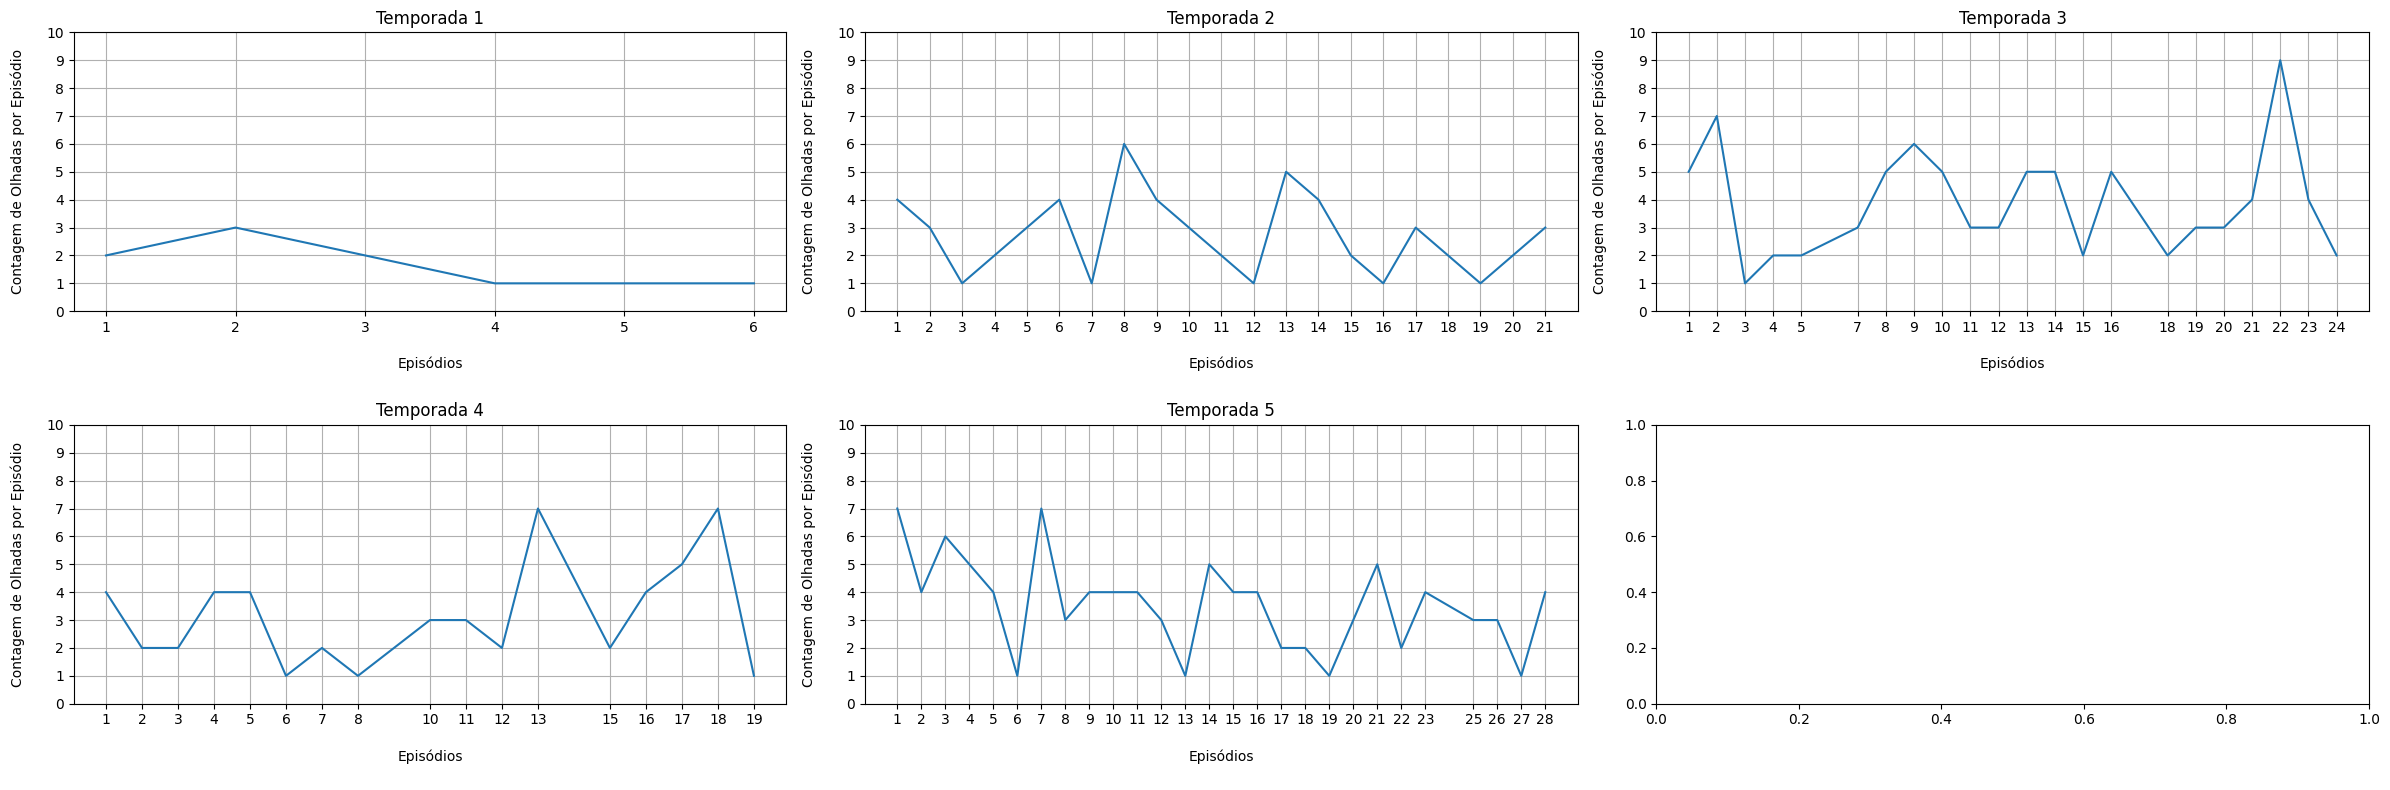

In [226]:
looks = teste.groupby(['Season', 'Episode']).size().reset_index(name='frq')
fig, axes = plt.subplots(nrows=(len(looks['Season'].unique()) + 2) // 3, ncols=3, figsize=(24, 8))

for idx, (season, season_data) in enumerate(looks.groupby('Season')):
    row_idx = idx // 3
    col_idx = idx % 3

    ax = axes[row_idx, col_idx]
    ax.plot(season_data['Episode'], season_data['frq'])
    ax.set_xticks(season_data['Episode'])
    ax.set_yticks(range(0, 11))
    ax.set_title(f'Temporada {season}')
    ax.set_xlabel('\nEpisódios\n')
    ax.set_ylabel('Contagem de Olhadas por Episódio\n')
    ax.grid(True)

plt.tight_layout()
plt.show()

Número total de olhadas registradas por temporada:

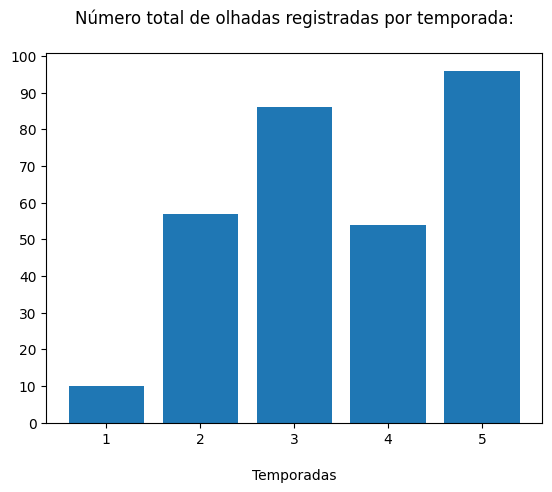

In [235]:
looks = teste.groupby('Season').size()
bars = plt.bar(looks.index, looks.values, color='b')

for bar, olhadas in zip(bars, looks.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.3, olhadas,
             ha ='center', va ='bottom', fontsize = 8)

plt.bar(looks.index, looks.values)
plt.xticks(looks.index)
plt.yticks(range(0, max(looks) + 10, 10))
plt.title(f'Número total de olhadas registradas por temporada:\n')
plt.xlabel('\nTemporadas')
plt.show()


Influenciadores das olhadas de Jim para câmera e suas respostas emocionais ao cenário:

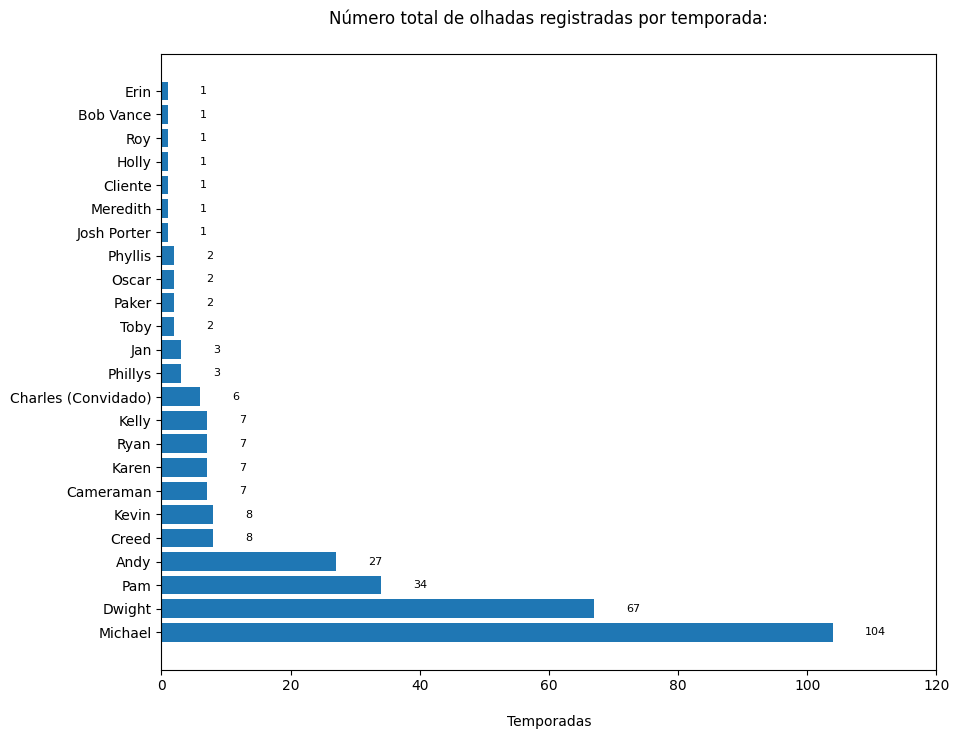

In [298]:
count = teste['Influencer'].str.strip().value_counts()
characters = count.index.tolist()
plt.figure(figsize=(10, 8))
bars = plt.barh(characters, count)

for bar, looks, influencer in zip(bars, count, characters):
    plt.text(bar.get_width() + 5, bar.get_y() + bar.get_height() / 2, looks,
             ha = 'left', va = 'center', fontsize = 8)

plt.xticks(range(0, max(count) + 25, 20))
plt.yticks(range(len(characters)), characters)

plt.title(f'Número total de olhadas registradas por temporada:\n')
plt.xlabel('\nTemporadas')
plt.show()

In [ ]:
responses = teste['Emotional_Responses'].unique()
